# Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

# My_Movies 

In [25]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import pyforest

In [23]:
movies=pd.read_csv("my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [24]:
mo=movies.iloc[:,5:]
mo

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# for whole dataset with support=0.1 , lift_thershold=0.8 and confi_threshold=0.9

In [4]:
# using apriori for determing support of itemsets (with min_support=0.1)

In [5]:
movie_itemsets1 = apriori(mo, min_support=0.1, use_colnames=True)
movie_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [8]:
# rules with min confidence of 0.9
confi_rules = association_rules(movie_itemsets1, metric="confidence", min_threshold=0.9)
confi_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Harry Potter1, Sixth Sense)","(LOTR2, Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(Sixth Sense, LOTR1)","(LOTR2, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [9]:
# Finding association rules wiht threshold of 0.8
rules1 = association_rules(movie_itemsets1, metric="lift", min_threshold=0.8)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
241,(LOTR2),"(Green Mile, Harry Potter1, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Sixth Sense),"(LOTR2, Harry Potter1, Green Mile, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
243,(Green Mile),"(LOTR2, Harry Potter1, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Harry Potter1),"(LOTR2, Sixth Sense, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [10]:
# Sorting the association rules with heighest lift ratio for top 10
rules1.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
137,"(Gladiator, Green Mile)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.0,0.09,inf
166,"(Green Mile, LOTR1)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
222,"(LOTR2, Harry Potter1, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
221,"(LOTR2, Sixth Sense, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
181,"(LOTR2, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
155,"(Sixth Sense, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
182,"(Sixth Sense, LOTR1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
132,"(Gladiator, Sixth Sense, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
169,"(Sixth Sense, LOTR1)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
150,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [11]:
# Gathering the most effictive rules which have lift ratio greater than 1
r1=rules1[rules1.lift>1]
r1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
241,(LOTR2),"(Green Mile, Harry Potter1, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Sixth Sense),"(LOTR2, Harry Potter1, Green Mile, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
243,(Green Mile),"(LOTR2, Harry Potter1, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Harry Potter1),"(LOTR2, Sixth Sense, Green Mile, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [12]:
l=r1.pivot('antecedents','consequents','lift')
l.head()

consequents,(Sixth Sense),"(Green Mile, LOTR2)","(Green Mile, LOTR)","(Braveheart, Patriot)","(Gladiator, Braveheart)","(LOTR2, LOTR1)","(Green Mile, Sixth Sense, LOTR)",(Harry Potter1),"(Gladiator, Green Mile, LOTR)","(Gladiator, Sixth Sense, LOTR)",...,"(Gladiator, LOTR)","(Gladiator, Green Mile)","(Sixth Sense, LOTR1)","(Harry Potter1, LOTR1)","(Green Mile, Harry Potter1, LOTR2)","(Harry Potter1, Sixth Sense)","(LOTR2, Harry Potter1, Green Mile, LOTR1)","(LOTR2, Sixth Sense)","(Patriot, Sixth Sense)","(LOTR2, Harry Potter1, Sixth Sense, Green Mile)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Gladiator),1.190476,NaN,1.428571,1.428571,NaN,NaN,1.428571,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN
"(Green Mile, LOTR)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR2, LOTR1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5]),
 [Text(0.5, 0, "frozenset({'Sixth Sense'})"),
  Text(2.5, 0, "frozenset({'Green Mile', 'LOTR'})"),
  Text(4.5, 0, "frozenset({'Gladiator', 'Braveheart'})"),
  Text(6.5, 0, "frozenset({'Green Mile', 'Sixth Sense', 'LOTR'})"),
  Text(8.5, 0, "frozenset({'Gladiator', 'Green Mile', 'LOTR'})"),
  Text(10.5, 0, "frozenset({'Gladiator', 'Sixth Sense', 'Green Mile'})"),
  Text(12.5, 0, "frozenset({'LOTR2', 'Sixth Sense', 'LOTR1'})"),
  Text(14.5, 0, "frozenset({'LOTR2', 'Harry Potter1', 'Sixth Sense'})"),
  Text(16.5, 0, "frozenset({'Green Mile', 'Sixth Sense', 'LOTR1'})"),
  Text(18.5, 0, "frozenset({'Green Mile', 'Sixth Sense', 'LOTR2'})"),
  Text(20.5, 0, "frozenset({'LOTR2', 'Sixth Sense', 'Green Mile', 'LOTR1'})"),
  Text(22.5, 0, "frozenset({'Green Mile', 'Harry Potter1'})"),
  Text(24.5, 0, "frozenset({'Gladiator'})"),


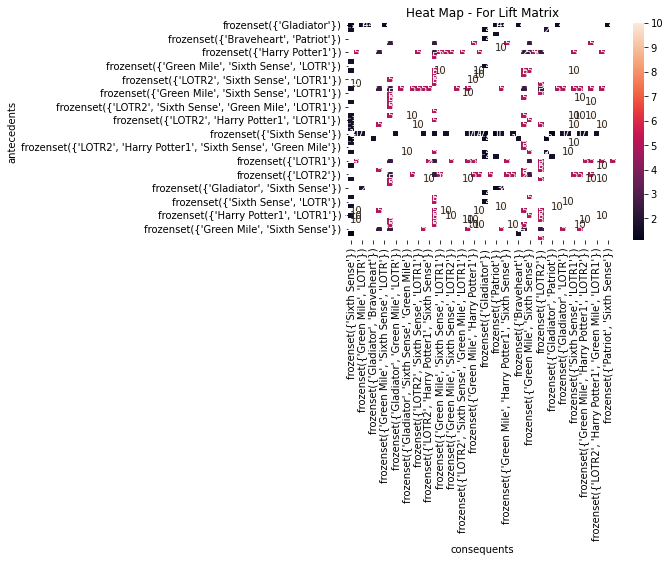

In [13]:
# Vizualising rules with Heatmap for lift ratio
sns.heatmap(l,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'support vs confidence')

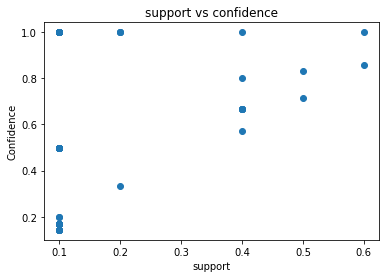

In [14]:
# Scatter plot for the associatioin rules with their confidence vs support 
sup=r1['support']
con=r1['confidence']
plt.scatter(sup,con)
plt.xlabel('support')
plt.ylabel('Confidence')
plt.title('support vs confidence')

# Association rules with support=0.15 and threshold=0.85 for whole dataset

In [15]:
movie_itemsets2 = apriori(mo, min_support=0.15, use_colnames=True)
movie_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [16]:
rules2 = association_rules(movie_itemsets2, metric="lift", min_threshold=0.85)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [17]:
r2=rules2[rules2.lift>1]
r2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


# For movie dataset top 5 datapoints with support=0.2 and thershold=0.95

In [18]:
mo2=mo.head()
mo2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [19]:
movie_itemsets3 = apriori(mo2, min_support=0.2, use_colnames=True)
movie_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.6,(Gladiator)
2,0.4,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.4,(LOTR2)
6,0.2,(Braveheart)
7,0.2,(Green Mile)
8,0.4,"(Gladiator, Sixth Sense)"
9,0.2,"(Sixth Sense, LOTR1)"


In [20]:
rules3 = association_rules(movie_itemsets3, metric="lift", min_threshold=0.95)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
1,(Sixth Sense),(Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Harry Potter1),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Sixth Sense),(Harry Potter1),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
191,(LOTR2),"(Green Mile, Harry Potter1, Sixth Sense, LOTR1)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
192,(Sixth Sense),"(LOTR2, Harry Potter1, Green Mile, LOTR1)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
193,(Green Mile),"(LOTR2, Harry Potter1, Sixth Sense, LOTR1)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
194,(Harry Potter1),"(LOTR2, Sixth Sense, Green Mile, LOTR1)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [21]:
r3=rules3[rules3.lift>1]
r3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
1,(Sixth Sense),(Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
2,(Harry Potter1),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Sixth Sense),(Harry Potter1),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
191,(LOTR2),"(Green Mile, Harry Potter1, Sixth Sense, LOTR1)",0.4,0.2,0.2,0.500000,2.500000,0.12,1.6
192,(Sixth Sense),"(LOTR2, Harry Potter1, Green Mile, LOTR1)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
193,(Green Mile),"(LOTR2, Harry Potter1, Sixth Sense, LOTR1)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
194,(Harry Potter1),"(LOTR2, Sixth Sense, Green Mile, LOTR1)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf


# Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 
# Book

In [26]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import pyforest

In [27]:
book=pd.read_csv("book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# for whole dataset with support=0.1, lift_therhold=0.8,confi_threshold=0.5

In [28]:
# using apriori for determing support of itemsets (with min_support=0.1)
book_itemsets = apriori(book, min_support=0.1, use_colnames=True)
book_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [29]:
# rules with min confidence of 0.5
confi_rules = association_rules(book_itemsets, metric="confidence", min_threshold=0.5)
confi_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


In [31]:
rules = association_rules(book_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [32]:
# Sorting the association rules with heighest lift ratio for top 10
rules.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
28,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
99,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
94,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [33]:
# Gathering the most effictive rules which have lift ratio greater than 1
r=rules[rules.lift>1]
r


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [34]:
l=r.pivot('antecedents','consequents','lift')
l.head()

consequents,(ChildBks),(YouthBks),"(GeogBks, DoItYBks)","(GeogBks, ChildBks)","(GeogBks, CookBks)","(ChildBks, ArtBks)","(CookBks, ArtBks)","(ChildBks, RefBks)","(CookBks, RefBks)","(ChildBks, DoItYBks)",...,"(YouthBks, CookBks)","(ChildBks, CookBks)",(ItalCook),(GeogBks),(ArtBks),(RefBks),(DoItYBks),(CookBks),"(GeogBks, ArtBks)","(ArtBks, DoItYBks)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(YouthBks),1.576044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.035985,NaN,1.764017,1.693281,NaN,1.654846,1.518667,NaN,NaN
(ChildBks),NaN,1.576044,1.864490,NaN,1.835989,NaN,1.790745,NaN,1.899004,NaN,...,1.882497,NaN,NaN,1.670264,1.594028,1.669725,1.542511,1.404179,1.891253,NaN
(CookBks),1.404179,1.518667,1.899926,1.778809,NaN,1.806175,NaN,1.876058,NaN,1.841017,...,NaN,NaN,2.320186,1.618245,1.607763,1.649549,1.542677,NaN,1.883445,1.906873
"(GeogBks, DoItYBks)",1.864490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.899926,NaN,NaN
"(GeogBks, CookBks)",1.835989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.230964,NaN,1.998711,NaN,NaN,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'YouthBks'})"),
  Text(2.5, 0, "frozenset({'GeogBks', 'DoItYBks'})"),
  Text(3.5, 0, "frozenset({'GeogBks', 'ChildBks'})"),
  Text(4.5, 0, "frozenset({'GeogBks', 'CookBks'})"),
  Text(5.5, 0, "frozenset({'ChildBks', 'ArtBks'})"),
  Text(6.5, 0, "frozenset({'CookBks', 'ArtBks'})"),
  Text(7.5, 0, "frozenset({'ChildBks', 'RefBks'})"),
  Text(8.5, 0, "frozenset({'CookBks', 'RefBks'})"),
  Text(9.5, 0, "frozenset({'ChildBks', 'DoItYBks'})"),
  Text(10.5, 0, "frozenset({'CookBks', 'DoItYBks'})"),
  Text(11.5, 0, "frozenset({'YouthBks', 'ChildBks'})"),
  Text(12.5, 0, "frozenset({'YouthBks', 'CookBks'})"),
  Text(13.5, 0, "frozenset({'ChildBks', 'CookBks'})"),
  Text(14.5, 0, "frozenset({'ItalCook'})"),
  Text(15.5, 0, "frozenset({'GeogBks'})"),
  Text(16.5, 0, "frozenset({'A

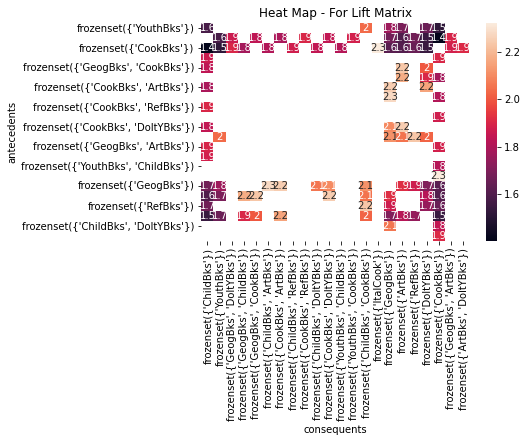

In [35]:
# Vizualising rules with Heatmap for lift ratio
sns.heatmap(l,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'support vs confidence')

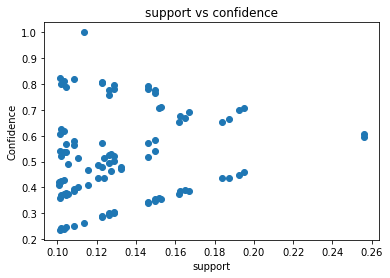

In [36]:
# Scatter plot for the associatioin rules with their confidence vs support 
sup=r['support']
con=r['confidence']
plt.scatter(sup,con)
plt.xlabel('support')
plt.ylabel('Confidence')
plt.title('support vs confidence')

# Association rules with support=0.16 and threshold=0.9 for whole dataset

In [37]:
book_itemsets2 = apriori(book, min_support=0.16, use_colnames=True)
book_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [38]:
rules2 = association_rules(book_itemsets2, metric="lift", min_threshold=0.9)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
7,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


In [39]:
r2=rules2[rules2.lift>1]
r2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
7,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
8,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
9,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


# For book dataset with 1000 datapoints with support=0.15 and thershold=0.95

In [40]:
book2=book[:100]
book2

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,0,0,0,0,0,0,0,0,0
96,1,1,0,0,0,0,0,0,0,0,0
97,1,0,1,0,0,0,1,1,0,0,0
98,1,1,1,1,0,0,1,0,0,0,0


In [41]:
book_itemsets3 = apriori(book2, min_support=0.15, use_colnames=True)
book_itemsets3

,support,itemsets
0,0.48,(ChildBks)
1,0.25,(YouthBks)
2,0.47,(CookBks)
3,0.29,(DoItYBks)
4,0.16,(RefBks)
5,0.23,(ArtBks)
6,0.34,(GeogBks)
7,0.18,"(YouthBks, ChildBks)"
8,0.29,"(ChildBks, CookBks)"
9,0.18,"(ChildBks, DoItYBks)"


In [42]:
rules3 = association_rules(book_itemsets3, metric="lift", min_threshold=0.95)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.25,0.48,0.18,0.720000,1.500000,0.0600,1.857143
1,(ChildBks),(YouthBks),0.48,0.25,0.18,0.375000,1.500000,0.0600,1.200000
2,(ChildBks),(CookBks),0.48,0.47,0.29,0.604167,1.285461,0.0644,1.338947
3,(CookBks),(ChildBks),0.47,0.48,0.29,0.617021,1.285461,0.0644,1.357778
4,(ChildBks),(DoItYBks),0.48,0.29,0.18,0.375000,1.293103,0.0408,1.136000
5,(DoItYBks),(ChildBks),0.29,0.48,0.18,0.620690,1.293103,0.0408,1.370909
6,(ChildBks),(ArtBks),0.48,0.23,0.19,0.395833,1.721014,0.0796,1.274483
7,(ArtBks),(ChildBks),0.23,0.48,0.19,0.826087,1.721014,0.0796,2.990000
8,(GeogBks),(ChildBks),0.34,0.48,0.25,0.735294,1.531863,0.0868,1.964444
9,(ChildBks),(GeogBks),0.48,0.34,0.25,0.520833,1.531863,0.0868,1.377391


In [43]:
r3=rules3[rules3.lift>1]
r3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.25,0.48,0.18,0.720000,1.500000,0.0600,1.857143
1,(ChildBks),(YouthBks),0.48,0.25,0.18,0.375000,1.500000,0.0600,1.200000
2,(ChildBks),(CookBks),0.48,0.47,0.29,0.604167,1.285461,0.0644,1.338947
3,(CookBks),(ChildBks),0.47,0.48,0.29,0.617021,1.285461,0.0644,1.357778
4,(ChildBks),(DoItYBks),0.48,0.29,0.18,0.375000,1.293103,0.0408,1.136000
5,(DoItYBks),(ChildBks),0.29,0.48,0.18,0.620690,1.293103,0.0408,1.370909
6,(ChildBks),(ArtBks),0.48,0.23,0.19,0.395833,1.721014,0.0796,1.274483
7,(ArtBks),(ChildBks),0.23,0.48,0.19,0.826087,1.721014,0.0796,2.990000
8,(GeogBks),(ChildBks),0.34,0.48,0.25,0.735294,1.531863,0.0868,1.964444
9,(ChildBks),(GeogBks),0.48,0.34,0.25,0.520833,1.531863,0.0868,1.377391


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 0, "frozenset({'ChildBks'})"),
  Text(1.5, 0, "frozenset({'YouthBks'})"),
  Text(2.5, 0, "frozenset({'GeogBks', 'DoItYBks'})"),
  Text(3.5, 0, "frozenset({'GeogBks', 'ChildBks'})"),
  Text(4.5, 0, "frozenset({'GeogBks', 'CookBks'})"),
  Text(5.5, 0, "frozenset({'ChildBks', 'ArtBks'})"),
  Text(6.5, 0, "frozenset({'CookBks', 'ArtBks'})"),
  Text(7.5, 0, "frozenset({'ChildBks', 'RefBks'})"),
  Text(8.5, 0, "frozenset({'CookBks', 'RefBks'})"),
  Text(9.5, 0, "frozenset({'ChildBks', 'DoItYBks'})"),
  Text(10.5, 0, "frozenset({'CookBks', 'DoItYBks'})"),
  Text(11.5, 0, "frozenset({'YouthBks', 'ChildBks'})"),
  Text(12.5, 0, "frozenset({'YouthBks', 'CookBks'})"),
  Text(13.5, 0, "frozenset({'ChildBks', 'CookBks'})"),
  Text(14.5, 0, "frozenset({'ItalCook'})"),
  Text(15.5, 0, "frozenset({'GeogBks'})"),
  Text(16.5, 0, "frozenset({'A

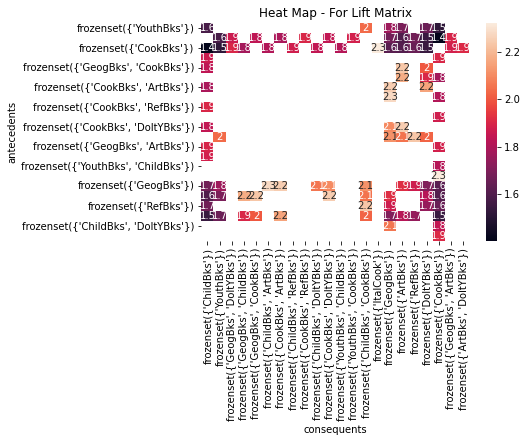

In [44]:
sns.heatmap(l,annot = True)
plt.title('Heat Map - For Lift Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)